<a href="https://colab.research.google.com/github/DeepHiveMind/Models-used-in-Deep-Learning-and-Deep-Reinforcement-Learning/blob/master/Speech_Recognition_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Mounting Google Drive in Google Colab

In [0]:
from google.colab import drive
drive.mount('/mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /mydrive


<b>Navigating to project directory

In [0]:
cd ..

/


In [0]:
cd mydrive/My Drive/speech_command_recognition

/mydrive/My Drive/speech_command_recognition


<b>Installing required packages

In [0]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.4.1-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip3 install librosa
!pip3 install Pillow==4.0.0
!pip3 install PIL
!pip3 install image
import PIL.Image

    100% |████████████████████████████████| 483.0MB 42.9MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x57a0c000 @  0x7f743efca1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 2.8MB/s 
    100% |████████████████████████████████| 2.0MB 6.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 1.6MB 8.4MB/s 
    100% |████████████████████████████████| 327kB 10.7MB/s 
    100% |████████████████████████████████| 2.4MB 9.9MB/s 
    100% |████████████████████████████████| 16.1MB 2.4MB/s 
  Running setup.py bdist_wheel for librosa ... done
  Stored in directory: /root/.cache/pip/wheels/18/b8/10/f0f8f6ac60668a5

<h2>Getting more juice from Google Colab</h2>
By default, the size of /dev/shm directory in Google Colab is only 64 MB.
If we use this default size, then we cannot use num_workers in pytorch dataloaders, because 64MB is not enough to fit more than 1 batch (with batch size of 64) in /dev/shm.
With num_wokers=0, it will take around 80 minutes to train the model (only the fc layer) just for 1 epoch (235 batches).
In these commands, we increase the size of /dev/shm to 4 GB which allows us to use num_workers=8 with batch_size of 64.
Pytorch's dataloader loads data from dataset and applies the specified transformations. This whole process is done on CPU. Only the model training is done on GPU. On Google Colab, it takes around 1-1.5 seconds to train 1 batch (of size 64) on GPU. The rest of time is spent on loading the batches. With num_workers=8, pytorch uses python multiprocessing to load batches and keep it ready when required. This python multiprocessing uses /dev/shm to store the batches that are ready. Note that /dev/shm (shared memory) is virtual memory which resides on RAM and not on HDD, therefore it has faster access. With /dev/shm of size 4GB and num_workers=8, it takes around 2 minutes 50 seconds (for fc layer) for training a single epoch which has 235 batches!

<b>df -h is used to display information about mounted partitions. (Note the size of /dev/shm is 64M)

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   11G  330G   4% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  249M  6.2G   4% /opt/bin
/dev/sda1       365G   13G  353G   4% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   12G  3.4G  78% /mydrive


In [0]:
cat ../../../etc/fstab

# UNCONFIGURED FSTAB FOR BASE SYSTEM


<b>To change the size of /dev/shm, we need to modify the /etc/fstab file

In [0]:
!echo "tmpfs /dev/shm tmpfs defaults,size=4g 0 0" >> ../../../etc/fstab

In [0]:
cat ../../../etc/fstab

# UNCONFIGURED FSTAB FOR BASE SYSTEM
tmpfs /dev/shm tmpfs defaults,size=4g 0 0


<b>After modifying the /etc/fstab file, we need to remount /dev/shm

In [0]:
!mount -o remount /dev/shm

<b>We can now see that the size of /dev/shm is changed to 4GB

In [0]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   11G  330G   4% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  249M  6.2G   4% /opt/bin
/dev/sda1       365G   13G  353G   4% /etc/hosts
shm             4.0G     0  4.0G   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   12G  3.4G  78% /mydrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

<b>Importing required packages from project

In [0]:
import torch
from torchvision import models
import matplotlib.pyplot as plt
from data_loaders import data_loader
from trainer import train

In [0]:
PATH = 'datasets/speech_command_data/'
train_path = f'{PATH}train'
valid_path = f'{PATH}valid'
test_path = 'datasets/test_images'

In [0]:
train_dl, valid_dl, test_dl = data_loader.get_data_loaders(train_path=train_path, valid_path=valid_path, test_path=test_path,
                                                          batch_size=64, num_workers=8)

Calculating mean and std of training dataset
Mean:tensor([0.2582, 0.1298, 0.3936])
Std:tensor([0.0526, 0.1985, 0.0859])


In [0]:
model = models.resnet34(pretrained=True)

In [0]:
criterion = torch.nn.CrossEntropyLoss()

In [0]:
trainer = train.ModelTrainer(model=model, train_dl=train_dl, valid_dl=valid_dl, test_dl=test_dl, criterion=criterion)

Model moved to GPU


<b>ModelTrainer modifies the fc layer so that last layer output corressponds to number of classes in training data

In [0]:
trainer.model.fc

Linear(in_features=512, out_features=10, bias=True)

<b>ModelTrainer freezes all the layers except the fc layer. We can prevent this by passing freeze=False while creating ModelTrainer

In [0]:
next(iter(trainer.model.parameters())).requires_grad

False

<b>dummy_sgdr is a function which plots changing learning rate at every iteration in sgdr considering the passed parameters 

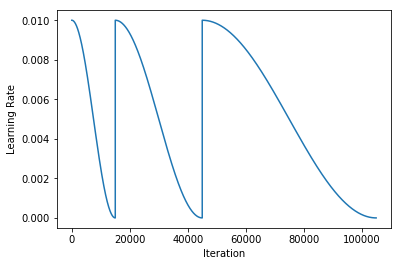

In [0]:
trainer.dummy_sgdr(learning_rate=1e-2, n_cycles=3, cycle_len=1, cycle_mult=2)

<b>Training the newly added fully connected layer for 3 epochs</b>
<br>Note:The fit method by default does SGDR. We have only passed value for n_cycles, by not passing values for cycle_len and cycle_mult (by default they both are 1), it is equivalent to training normally for 3 epochs

In [0]:
trainer.fit(n_cycles=3, learning_rate=1e-2)

Cycle:1
	Epoch:1/1
	Train Loss:1.300595998764038
	Valid Loss:0.023149747610092163 Valid Accuracy:0.5115000000000001
	--------------------------------------------------
Cycle:2
	Epoch:1/1
	Train Loss:1.4793049097061157
	Valid Loss:0.021648041665554046 Valid Accuracy:0.533
	--------------------------------------------------
Cycle:3
	Epoch:1/1
	Train Loss:1.055864691734314
	Valid Loss:0.021480137884616852 Valid Accuracy:0.537
	--------------------------------------------------


<b>The fit method appends the learing rates at each iteration in a list named 'opt_lrs'</b>
<br>We can plot that list to visualize the graph of learning rate vs iterations for current SGDR

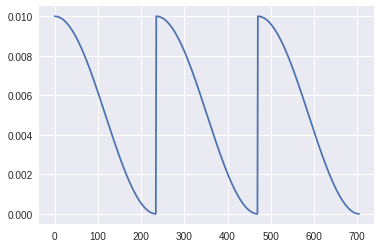

In [0]:
plt.plot(trainer.opt_lrs)

<b>Unfreezing all the layers to finetune the network

In [0]:
trainer.unfreeze()

<b>Verifying that the model is unfreezed

In [0]:
next(iter(trainer.model.parameters())).requires_grad

True

<b>Training the model using SGDR for 4 cycles with cycle_mult=2</b>
<br>Initially, the cycle_len is 1 epoch. After every cycle, cycle_len is multiplied by cycle_mult to increase the cycle length (number of epochs in cycle). This is the 'restart' in 'Stochastic Gradient Descent with Restarts'.

In [0]:
trainer.fit(n_cycles=4, cycle_len=1, cycle_mult=2, learning_rate=1e-2, save_snapshot=True)

Cycle:1
	Epoch:1/1
	Train Loss:0.02501755952835083
	Valid Loss:0.0019359999243170024 Valid Accuracy:0.9580000000000001
	--------------------------------------------------
	Snapshot saved!
Cycle:2
	Epoch:1/2
	Train Loss:0.4578493535518646
	Valid Loss:0.0018855551593005657 Valid Accuracy:0.963
	--------------------------------------------------
	Epoch:2/2
	Train Loss:0.05540933087468147
	Valid Loss:0.0015016897190362215 Valid Accuracy:0.968
	--------------------------------------------------
	Snapshot saved!
Cycle:3
	Epoch:1/4
	Train Loss:0.1120382621884346
	Valid Loss:0.002009697226807475 Valid Accuracy:0.9595
	--------------------------------------------------
	Epoch:2/4
	Train Loss:0.0171506404876709
	Valid Loss:0.00173743986338377 Valid Accuracy:0.964
	--------------------------------------------------
	Epoch:3/4
	Train Loss:0.010412613861262798
	Valid Loss:0.001596360307186842 Valid Accuracy:0.97
	--------------------------------------------------
	Epoch:4/4
	Train Loss:0.0619528479

<b>Again, plotting the opt_lrs list to visualize SGDR

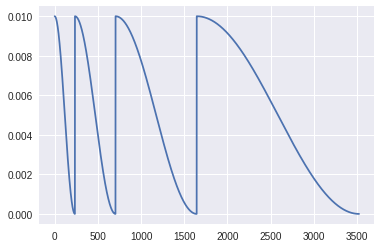

In [0]:
plt.plot(trainer.opt_lrs)

<b>Loading the latest model

In [0]:
state = torch.load('saved/2018-09-24_15:30:53/cycle_3')

In [0]:
trainer.model.load_state_dict(state['model'])

In [0]:
test_acc = trainer.test_epoch()

Performing Test Epoch


In [0]:
print(f'Test Accuracy:{test_acc}')

Test Accuracy:0.9042553191489362


<b>Predicting test set with top 3 snapshots (models)

In [0]:
snapshot_test_acc_3 = trainer.predict('saved/2018-09-24_15:30:53', n_models=3)

In [0]:
print(f'Snapshot Ensemble Test Accuracy with top 3 models:{snapshot_test_acc_3}')

Snapshot Ensemble Test Accuracy with top 3 models:0.9042553191489362


<b>Predicting test set with top 4 snapshots (models)

In [0]:
snapshot_test_acc_4 = trainer.predict('saved/2018-09-24_15:30:53', n_models=4)

In [0]:
print(f'Snapshot Ensemble Test Accuracy with top 4 models:{snapshot_test_acc_4}')

Snapshot Ensemble Test Accuracy with top 4 models:0.9042553191489362
